In [73]:
import matplotlib.pyplot as plot
import librosa
from scipy.io import wavfile
import pandas as pd
import math
 

# Read the wav file (mono)

music_file_path = '/speech/dbwork/mul/spielwiese3/students/debaumas/datasets/tency_mastering_supervised_dry_wet_v2_22050_16bit/train/dry/0.wav'
sample_rate_speech = 16000
y, s = librosa.load(music_file_path, sr=sample_rate_speech) # Downsample 44.1kHz to 16kHz

In [74]:
note_ds = pd.DataFrame()
note_ds['Note'] = ['0','C0','C0#','D0','D0#','E0','F0','F0#','G0','G0#','A0','A0#','B0',
                    'C1','C1#','D1','D1#','E1','F1','F1#','G1','G1#','A1','A1#','B1',
                    'C2','C2#','D2','D2#','E2','F2','F2#','G2','G2#','A2','A2#','B2',
                    'C3','C3#','D3','D3#','E3','F3','F3#','G3','G3#','A3','A3#','B3',
                    'C4','C4#','D4','D4#','E4','F4','F4#','G4','G4#','A4','A4#','B4',
                    'C5','C5#','D5','D5#','E5','F5','F5#','G5','G5#','A5','A5#','B5',
                    'C6','C6#','D6','D6#','E6','F6','F6#','G6','G6#','A6','A6#','B6',
                    'C7','C7#','D7','D7#','E7','F7','F7#','G7','G7#','A7','A7#','B7',
                    'C8','C8#','D8','D8#','E8','F8','F8#','G8','G8#','A8','A8#','B8']
note_ds['Frequency'] = [0, 16.35, 17.32, 18.35, 19.45, 20.60, 21.83, 23.12, 24.50,
                        25.96, 27.50, 29.14, 30.87, 32.70, 34.65, 36.71, 38.89,
                        41.20, 43.65, 46.25, 49.00, 51.91, 55.00, 58.27, 61.74,
                        65.41, 69.30, 73.42, 77.78, 82.41, 87.31, 92.50, 98.00,
                        103.83, 110.00, 116.54, 123.47, 130.81, 138.59, 146.83,
                        155.56, 164.81, 174.61, 185.00, 196.00, 207.65, 220.00,
                        233.08, 246.94, 261.63, 277.18, 293.66, 311.13, 329.63,
                        349.23, 369.99, 392.00, 415.30, 440.00, 466.16, 493.88,
                        523.25, 554.37, 587.33, 622.25, 659.25, 698.46, 739.99,
                        783.99, 830.61, 880.00, 932.33, 987.77, 1046.50, 1108.73,
                        1174.66, 1244.51, 1318.51, 1396.91, 1479.98, 1567.98,
                        1661.22, 1760.00, 1864.66, 1975.53, 2093.00, 2217.46, 2349.32,
                        2489.02, 2637.02, 2793.83, 2959.96, 3135.96, 3322.44, 3520.00,
                        3729.31, 3951.07, 4186.01, 4434.92, 4698.63, 4978.03, 5274.04,
                        5587.65, 5919.91, 6271.93, 6644.88, 7040.00, 7458.62, 7902.13]
# Convert DataFrame to dictionary
note_dict = note_ds.set_index('Note').to_dict()['Frequency']


In [75]:
# read first 20 seconds of data
# 20 seconds of data in 16KHz frequency  = 320000 (16000 samples per second * 20 seconds)
# keeping the 20sec window dynamic
which_20sec = 2
samples_per_20sec = 20 * sample_rate_speech
data_for_spectogram = y[(which_20sec-1)*samples_per_20sec:which_20sec*samples_per_20sec]

In [76]:
tmp_file = pd.read_excel('/speech/dbwork/mul/spielwiese4/students/desengus/dry_crepe_pesto/excels/train/0.xlsx', index_col=0)
notes_considered_pesto = tmp_file.loc[which_20sec-1,'mean_note_pesto'].split(' ; ')
notes_considered_crepe = tmp_file.loc[which_20sec-1,'mean_note_crepe'].split(' ; ')
freq_considered_crepe = [note_dict[note] for note in notes_considered_crepe]
freq_considered_pesto = [note_dict[note] for note in notes_considered_pesto]
rounded_frequencies = max( math.ceil(max(freq_considered_crepe)/ 20) * 20, math.ceil(max(freq_considered_pesto)/ 20) * 20)*1.1



/speech/dbwork/mul/spielwiese4/students/desengus/miniconda3/envs/dev/lib/python3.10/site-packages/matplotlib/axes/_axes.py:7944: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


(0.0, 1628.0000000000002)

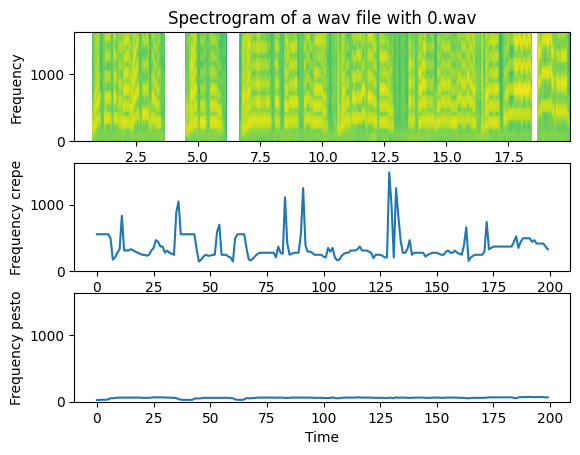

In [77]:
# Plot the signal read from wav file
plot.subplot(311)
plot.title('Spectrogram of a wav file with 0.wav')
plot.specgram(data_for_spectogram,Fs=s)
plot.xlabel('Time')
plot.ylabel('Frequency')
plot.ylim(0,rounded_frequencies)

plot.subplot(312)
plot.plot(freq_considered_crepe)
plot.xlabel('Time')
plot.ylabel('Frequency crepe')
plot.ylim(0,rounded_frequencies)

plot.subplot(313)
plot.plot(freq_considered_pesto)
plot.xlabel('Time')
plot.ylabel('Frequency pesto')
plot.ylim(0,rounded_frequencies)

In [78]:
tmp_file.columns

Index(['words', 'word_index', 'mean_note_pesto', 'median_note_pesto',
       'mode_note_pesto', 'mean_note_crepe', 'median_note_crepe',
       'mode_note_crepe'],
      dtype='object')

In [79]:
tmp_file = pd.read_excel('/speech/dbwork/mul/spielwiese4/students/desengus/lyme_ds_creation/songs/crepe_init_ds/0.xlsx', index_col=0)
tmp_file.head()

,words,word_index,mean_note_crepe,median_note_crepe,mode_note_crepe,prob_words,bpm
0,[silence] ; I've ; been ; looking ; at ; ...,0 ; 0 ; 0 ; 0 ; 0 ; 0 ; 0 ; 0 ; 0 ; 0 ; 0 ; 0 ...,0 ; 0 ; 0 ; 0 ; 0 ; 0 ; 0 ; 0 ; 0 ; 0 ; 0 ; 0 ...,0 ; 0 ; 0 ; 0 ; 0 ; 0 ; 0 ; 0 ; 0 ; 0 ; 0 ; 0 ...,0 ; 0 ; 0 ; 0 ; 0 ; 0 ; 0 ; 0 ; 0 ; 0 ; 0 ; 0 ...,nan ; nan ; nan ; nan ; nan ; nan ; nan ; nan ...,45
1,me. ; Bet ; you're ; thinking ; that ; w...,8 ; 8 ; 8 ; 8 ; 8 ; 8 ; 8 ; 8 ; 9 ; 9 ; 10 ; 1...,C5# ; C5# ; C5# ; C5# ; C5# ; C5# ; B4 ; F3 ; ...,C5# ; C5# ; C5# ; C5# ; C5# ; C5# ; C5# ; E3 ;...,C5# ; C5# ; C5# ; C5# ; C5# ; C5# ; C5# ; F3 ;...,0.9992260932922363 ; 0.9992260932922363 ; 0.99...,156
2,girl ; I ; can't ; help ; myself ; Somet...,42 ; 42 ; 42 ; 42 ; 42 ; 42 ; 42 ; 42 ; 42 ; 4...,F4# ; G4# ; G4 ; F4# ; E4 ; D4# ; E2 ; B4 ; C5...,F4# ; G4# ; G4 ; F4# ; E4 ; D4# ; C1 ; G1 ; C5...,F4# ; G4 ; G4# ; F4# ; F4 ; E4 ; D4 ; C1 ; C5#...,0.9215835928916931 ; 0.9215835928916931 ; 0.92...,159
3,"whirl, ; but ; I'm ; warning ; you, ; bo...",77 ; 77 ; 77 ; 78 ; 78 ; 79 ; 79 ; 80 ; 80 ; 8...,G4 ; C4 ; B3 ; B3 ; B3 ; B3 ; B3 ; D4# ; E4 ; ...,G4 ; B3 ; B3 ; B3 ; B3 ; B3 ; B3 ; D4# ; D4# ;...,F4# ; F4 ; B3 ; B3 ; B3 ; B3 ; B3 ; D4 ; D4# ;...,0.9986490607261658 ; 0.9986490607261658 ; 0.99...,156
4,slow ; Some ; folks ; may ; say ; I'm ; ...,108 ; 108 ; 108 ; 108 ; 108 ; 108 ; 108 ; 108 ...,B3 ; B3 ; A3# ; A3 ; D4 ; G4# ; C5# ; D4 ; C5#...,B3 ; B3 ; A3 ; A3 ; A3 ; C5# ; C5# ; C4# ; C5#...,B3 ; B3 ; A3# ; A3 ; A3 ; C5# ; C5# ; C5# ; C5...,0.9813392758369446 ; 0.9813392758369446 ; 0.98...,156


In [80]:
notes_considered_crepe = tmp_file.loc[which_20sec-1,'mean_note_crepe'].split(' ; ')
freq_considered_crepe = [note_dict[note] for note in notes_considered_crepe]
rounded_frequencies = max(freq_considered_crepe)*1,1 # only for the plots
prob_words = tmp_file.loc[which_20sec-1,'prob_words'].split(' ; ')

In [81]:
rounded_frequencies[0]

1479.98

In [82]:
prob_words = [float(word) for word in prob_words]

/speech/dbwork/mul/spielwiese4/students/desengus/miniconda3/envs/dev/lib/python3.10/site-packages/matplotlib/axes/_axes.py:7944: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


(0.0, 1.0)

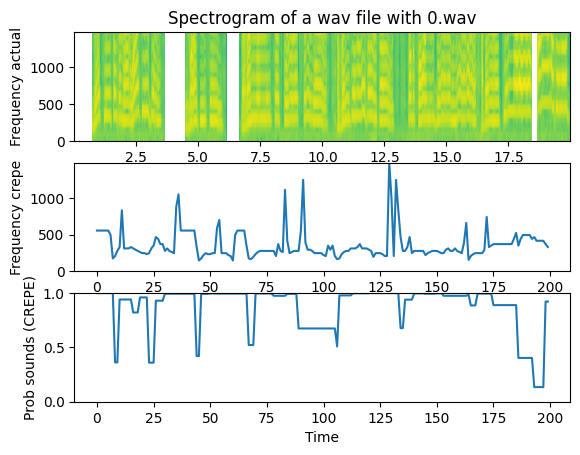

In [83]:
# Plot the signal read from wav file
plot.subplot(311)
plot.title('Spectrogram of a wav file with 0.wav')
plot.specgram(data_for_spectogram,Fs=s)
plot.xlabel('Time')
plot.ylabel('Frequency actual')
plot.ylim(0,rounded_frequencies[0])

plot.subplot(312)
plot.plot(freq_considered_crepe)
plot.xlabel('Time')
plot.ylabel('Frequency crepe')
plot.ylim(0,rounded_frequencies[0])

plot.subplot(313)
plot.plot(prob_words)
plot.xlabel('Time')
plot.ylabel('Prob sounds (CREPE)')
plot.ylim(0,1)

In [84]:
data_for_spectogram.shape

(320000,)

In [85]:
import whisper
import torch

In [86]:
# apply whisper to get the text
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
model = whisper.load_model("medium.en", device=device)
result = whisper.transcribe(model = model , audio = data_for_spectogram, word_timestamps=True)


In [87]:
result

{'text': " Bet you're thinking that what you get is what you say But underneath this cool exterior, a raging river flows So before you get any nearer, I better let you know I'm an emotional girl",
 'segments': [{'id': 0,
   'seek': 0,
   'start': 0.0,
   'end': 6.0,
   'text': " Bet you're thinking that what you get is what you say",
   'tokens': [50363,
    5147,
    345,
    821,
    3612,
    326,
    644,
    345,
    651,
    318,
    644,
    345,
    910,
    50695],
   'temperature': 0.0,
   'avg_logprob': -0.2881497343381246,
   'compression_ratio': 1.3759398496240602,
   'no_speech_prob': 0.023380201309919357,
   'words': [{'word': ' Bet',
     'start': 0.0,
     'end': 1.06,
     'probability': 0.5159985423088074},
    {'word': " you're",
     'start': 1.06,
     'end': 1.62,
     'probability': 0.9530966579914093},
    {'word': ' thinking',
     'start': 1.62,
     'end': 1.86,
     'probability': 0.7744101285934448},
    {'word': ' that',
     'start': 1.86,
     'end': 2.

In [88]:
for i in range(result['segments'][-1]['id']):
    print("ID number is "+str(i))
    print(result['segments'][i]["text"])
    print(result['segments'][i]["words"])
    print(result['segments'][i]["start"])
    print(result['segments'][i]["end"])

ID number is 0
 Bet you're thinking that what you get is what you say
[{'word': ' Bet', 'start': 0.0, 'end': 1.06, 'probability': 0.5159985423088074}, {'word': " you're", 'start': 1.06, 'end': 1.62, 'probability': 0.9530966579914093}, {'word': ' thinking', 'start': 1.62, 'end': 1.86, 'probability': 0.7744101285934448}, {'word': ' that', 'start': 1.86, 'end': 2.28, 'probability': 0.9711573123931885}, {'word': ' what', 'start': 2.28, 'end': 2.6, 'probability': 0.9791868925094604}, {'word': ' you', 'start': 2.6, 'end': 3.02, 'probability': 0.9964507818222046}, {'word': ' get', 'start': 3.02, 'end': 3.54, 'probability': 0.9962449669837952}, {'word': ' is', 'start': 3.54, 'end': 4.64, 'probability': 0.6254950165748596}, {'word': ' what', 'start': 4.64, 'end': 4.96, 'probability': 0.9827200174331665}, {'word': ' you', 'start': 4.96, 'end': 5.32, 'probability': 0.9978458881378174}, {'word': ' say', 'start': 5.32, 'end': 6.0, 'probability': 0.9347513318061829}]
0.0
6.0
ID number is 1
 But unde

In [89]:
music_file_path = '/speech/dbwork/mul/spielwiese3/students/debaumas/datasets/tency_mastering_supervised_dry_wet_v2_22050_16bit/train/dry/835.wav'
sample_rate_speech = 16000
y, s = librosa.load(music_file_path, sr=sample_rate_speech) # Downsample 44.1kHz to 16kHz

In [90]:
data_whisper = y[0:16000*2]

In [91]:
whisper_result = whisper.transcribe(model = model , audio = data_whisper, word_timestamps=True)

In [92]:
whisper_result

{'text': ' you',
 'segments': [{'id': 0,
   'seek': 0,
   'start': 0.0,
   'end': 1.36,
   'text': ' you',
   'tokens': [50363, 345, 50466],
   'temperature': 0.0,
   'avg_logprob': -0.5228756070137024,
   'compression_ratio': 0.2727272727272727,
   'no_speech_prob': 0.9378191828727722,
   'words': [{'word': ' you',
     'start': 0.0,
     'end': 1.36,
     'probability': 0.40790411829948425}]}],
 'language': 'en'}

In [93]:
whisper_result['segments'][0]

{'id': 0,
 'seek': 0,
 'start': 0.0,
 'end': 1.36,
 'text': ' you',
 'tokens': [50363, 345, 50466],
 'temperature': 0.0,
 'avg_logprob': -0.5228756070137024,
 'compression_ratio': 0.2727272727272727,
 'no_speech_prob': 0.9378191828727722,
 'words': [{'word': ' you',
   'start': 0.0,
   'end': 1.36,
   'probability': 0.40790411829948425}]}

Text(0, 0.5, 'Frequency')

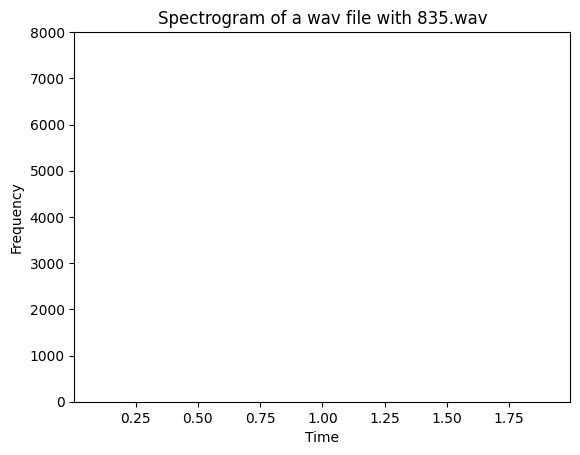

In [94]:
plot.title('Spectrogram of a wav file with 835.wav')
plot.specgram(data_whisper,Fs=16000)
plot.xlabel('Time')
plot.ylabel('Frequency')

In [95]:
data_whisper.max()

0.0

In [2]:
from audiolazy import str2midi, midi2str

ImportError: cannot import name 'Sequence' from 'collections' (/speech/dbwork/mul/spielwiese4/students/desengus/miniconda3/envs/dev/lib/python3.10/collections/__init__.py)